In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
# import simpreglib as srl
import pandas as pd
import numpy as np
import datetime as dt

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings # weird sns.distplot warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('data/cleaned_kc.csv')

In [3]:
def create_vif_dictionary(X):
    """
    Parameters
    ----------
    X: Pandas dataframe of predictive variables only.
        Should have `.columns` and `.values` attributes.
    """
    
    vif_dct = {}

    # Loop through each row and set the variable name to the VIF. 
    for i in range(len(X.columns)):
        # Calculate VIF
        vif = variance_inflation_factor(X.values, i)
        
        # Extract column name for dictionary key.
        v = X.columns[i]
        
        # Set value in dictionary.
        vif_dct[v] = vif

    return vif_dct

In [4]:
# convert age to an integer
ages = []
for age in df.age:
    age = age.split()[0]
    ages.append(float(age))
df.age = ages

In [5]:
# df.info()

In [6]:
# because its categprical and age represents essentially the same information
# df.drop('yr_built',axis=1,inplace=True)


In [7]:
y = df.price
X_labels = df.columns[1:]
X = df[X_labels]

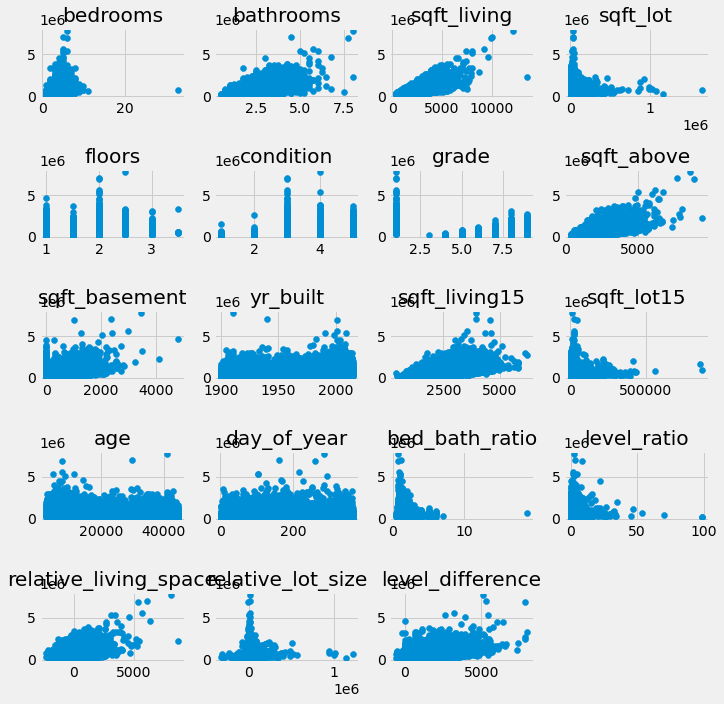

In [8]:
# visualize the relationship between the predictors and the target using scatterplots
plt.figure(figsize=(10,10))

for idx,label in enumerate(X_labels):
    ax = plt.subplot(5,4,idx+1)
    plt.scatter(X[label],y)
    plt.title(label)

plt.tight_layout()
plt.show()

In [33]:
# plt.figure(figsize=(10,10))

# for idx,label in enumerate(X_labels):
#     ax = plt.subplot(5,4,idx+1)
#     sns.distplot(X[label],hist=True)
#     plt.title(label)

# plt.tight_layout()
# plt.show()

In [34]:
# X.columns

### One-hot encoding for categorical variables

In [35]:
# one hot encode categorical variables into their own dataframes

floor_cats = X.floors.astype('category')
floor_dummies = pd.get_dummies(floor_cats,prefix='floor',drop_first=True)

# cond_cats = X.condition.astype('category')
# cond_dummies = pd.get_dummies(cond_cats,prefix='cond',drop_first=True)

grade_cats = X.grade.astype('category')
grade_dummies = pd.get_dummies(grade_cats,prefix='grade',drop_first=True)

# bed_cats = X.bedrooms.astype('category')
# bed_dummies = pd.get_dummies(bed_cats,prefix='beds',drop_first=True)

# bath_cats = X.bedrooms.astype('category')
# bath_dummies = pd.get_dummies(bath_cats,prefix='beds',drop_first=True)

hot_cats = pd.concat([floor_dummies,grade_dummies],axis=1)

In [36]:
X1 = pd.concat([X,hot_cats],axis=1)
#dropping columns that have been one hot encoded, duplicitous data
X1.drop(['yr_built','bedrooms','bathrooms','floors','condition','grade'],axis=1,inplace=True) 

In [37]:
X1.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'age', 'day_of_year', 'bed_bath_ratio',
       'level_ratio', 'relative_living_space', 'relative_lot_size',
       'level_difference', 'floor_1.5', 'floor_2.0', 'floor_2.5', 'floor_3.0',
       'floor_3.5', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9'],
      dtype='object')

In [38]:
predictors_int = sm.add_constant(X1)
model = sm.OLS(y,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     1603.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:10:26   Log-Likelihood:            -2.9089e+05
No. Observations:               21143   AIC:                         5.818e+05
Df Residuals:                   21121   BIC:                         5.820e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3.608e+05   1.55e+04     23.252      0.000     3.3e+05    3.91e+05
sqft_living             103.2842      1.404     73.586      0.000     100.533     106.035
sqft_lot                 -0.1792      0.026     -6.824      0.000      -0.231      -0.128
sqft_above               48.7074      0.969     50.267      0.000      46.808      50.607
sqft_basement            54.5768      1.222     44.651      0.000      52.181      56.973
sqft_living15            74.8424      2.193     34.126      0.000      70.544      79.141
sqft_lot15               -0.3422      0.045     -7.567      0.000      -0.431      -0.254
age                       9.9121      0.206     48.102      0.000       9.508      10.316
day_of_year             -84.8152     16.606     -5.108      0.000    -117.364     -52.267
bed_bath_ratio        -3.672e+04   2841.281    -12.923      0.000   -4.23e+04   -3.11e+04
level_ratio            6676.7674    645.298     10.347      0.000    5411.935    7941.600
relative_living_space    28.4418      1.907     14.917      0.000      24.705      32.179
relative_lot_size         0.1630      0.043      3.776      0.000       0.078       0.248
level_difference         -5.8694      1.702     -3.449      0.001      -9.205      -2.534
floor_1.5              2432.2423   6214.983      0.391      0.696   -9749.598    1.46e+04
floor_2.0              7893.1064   4911.573      1.607      0.108   -1733.952    1.75e+04
floor_2.5              1.379e+05    1.9e+04      7.262      0.000    1.01e+05    1.75e+05
floor_3.0              1.896e+05   1.07e+04     17.784      0.000    1.69e+05    2.11e+05
floor_3.5              3.182e+05   8.66e+04      3.676      0.000    1.49e+05    4.88e+05
grade_3               -5.615e+05   2.29e+05     -2.453      0.014   -1.01e+06   -1.13e+05
grade_4               -5.588e+05   4.54e+04    -12.315      0.000   -6.48e+05    -4.7e+05
grade_5                -5.59e+05   1.83e+04    -30.471      0.000   -5.95e+05   -5.23e+05
grade_6               -5.222e+05   1.15e+04    -45.537      0.000   -5.45e+05      -5e+05
grade_7               -4.673e+05   9284.257    -50.333      0.000   -4.85e+05   -4.49e+05
grade_8               -4.007e+05   8209.172    -48.815      0.000   -4.17e+05   -3.85e+05
grade_9               -2.807e+05   7854.483    -35.740      0.000   -2.96e+05   -2.65e+05
==============================================================================
Omnibus:                    17822.564   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1636183.519
Skew:                           3.548   Prob(JB):                         0.00
Kurtosis:                      45.508   Cond. No.                     4.21e+16
==============================================================================

In [39]:
const = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'age', 'day_of_year', 'bed_bath_ratio', 'level_ratio',
       'relative_living_space', 'relative_lot_size', 'level_difference']

In [60]:
# create_vif_dictionary(X1)

In [41]:
MAE = mean_absolute_error(y,model.predict())
MSE = mean_squared_error(y,model.predict())
rSE = np.sqrt(MSE)

print("Mean Absolute Error: ", MAE)
print("Mean Squared Error: ", MSE)
print("Root Mean Squared Error: ", rSE)

Mean Absolute Error:  143831.03470572905
Mean Squared Error:  52222389961.89713
Root Mean Squared Error:  228522.18702326724


In [42]:
# X1.iloc[:,0:13].hist(figsize=(10,10))
# plt.show()

### Observations

Items in pushin_p list show acceptable Pvalues, while items in maybe_p show unaccaptable Pvalues (P > 0.05) they visually appear to show a linear relationship on the scatter plot so they should be further investigated and perhaps transformed for a better fit into the OLS model. While items in pushin_vif are the only items that show acceptable variance inflation factors (VIF). 'day_of_year' and 'level_ratio' show acceptable VIF as well as acceptable Pvalues, indicating good confidence in these data features. 

The Durbin-Watson score is nearly perfect, which I find suspicious to say the least considering the obnoxious lack of normality amongst all the features. 

The root mean squared error is ASTRONOMICAL which means it is probably worth looking into standardizing the units accross feature. My intuition is that this is at least impart due to there being so man different units of measurement used among the continuous variables in the dataset. 

The Jarque-Bera score is through the roof, with a Pvalue of 0.0 indicating the null hypothesis that the data is normal should definitely be rejected; the skew and kurtosis is consistent with the model however. 

The model as a whole presents an extreme skewness as well as kurtosis, these statitics should reduce as the model improves; skewness and kurtosis should both move toward 1, skewness should go at least below zero and kurtosis should get as close to 3 as possible. This would indicate the data distribution finding a more "normal" shape. 

In [43]:
# from pathlib import Path  
# # model_data['price'] = y
# filepath = Path('data/one_hot_one.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# model_data.to_csv(filepath,index=False)

In [44]:
log_tran = pd.DataFrame([])

for feat in X1.iloc[:,0:13].columns:
    log_tran[feat] = np.log(X[feat])

log_tran.replace(np.NaN, 0,inplace=True)
log_tran['sqft_basement'].replace(np.NINF,5,inplace=True)
log_tran['level_ratio'].replace(np.NINF,-1,inplace=True)
log_tran['relative_living_space'].replace(np.NINF,-9.069928,inplace=True)
log_tran['relative_lot_size'].replace(np.NINF,-14.019086,inplace=True)
log_tran['level_difference'].replace(np.NINF,-8.989694,inplace=True)


In [59]:
predictors_int = sm.add_constant(log_tran)
model = sm.OLS(y,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     1777.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:17:07   Log-Likelihood:            -2.9316e+05
No. Observations:               21143   AIC:                         5.863e+05
Df Residuals:                   21129   BIC:                         5.865e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.069e+06   9.07e+04    -33.845      0.000   -3.25e+06   -2.89e+06
sqft_living           -6.431e+05   2.85e+04    -22.581      0.000   -6.99e+05   -5.87e+05
sqft_lot              -3.469e+04   5371.215     -6.459      0.000   -4.52e+04   -2.42e+04
sqft_above             4.207e+05   2.84e+04     14.796      0.000    3.65e+05    4.76e+05
sqft_basement          4.452e+05   8942.564     49.785      0.000    4.28e+05    4.63e+05
sqft_living15          2.367e+05   9060.810     26.120      0.000    2.19e+05    2.54e+05
sqft_lot15            -2.751e+04   5720.481     -4.809      0.000   -3.87e+04   -1.63e+04
age                    1.263e+05   3372.338     37.439      0.000     1.2e+05    1.33e+05
day_of_year             -82.2254     18.480     -4.450      0.000    -118.447     -46.004
bed_bath_ratio         -1.19e+05   6119.680    -19.449      0.000   -1.31e+05   -1.07e+05
level_ratio            2.196e+04   2373.794      9.251      0.000    1.73e+04    2.66e+04
relative_living_space   -99.0014    432.337     -0.229      0.819    -946.415     748.412
relative_lot_size      -217.1274    243.504     -0.892      0.373    -694.414     260.159
level_difference        344.1190      7.360     46.752      0.000     329.692     358.546
==============================================================================
Omnibus:                    16848.216   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1019794.850
Skew:                           3.376   Prob(JB):                         0.00
Kurtosis:                      36.347   Cond. No.                     9.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# log_tran.hist(figsize=(10,10))
# plt.show()

In [46]:
log_tran['level_difference'] = X1['level_difference']
log_tran['day_of_year'] = X1['day_of_year']

In [47]:
# log_tran.hist(figsize=(10,10))
# plt.show()

In [48]:
#mean normalization

norm_means = pd.DataFrame([])

for feat in log_tran.columns : 
    x_bar = np.mean(log_tran[feat])
    x_compliment = (log_tran[feat]-x_bar)/(np.max(log_tran[feat]) - np.min(log_tran[feat]))
    norm_means[feat] = x_compliment

In [49]:
# norm_means.hist(figsize=(10,10))

In [50]:
standardized = pd.DataFrame([])

for feat in X1.iloc[:,0:13].columns : 
    x_bar = np.mean(X1[feat])
    sigma = np.std(X1[feat])
    x_compliment = (X1[feat]-x_bar)/sigma
    standardized[feat] = x_compliment

In [51]:
# standardized.hist(figsize=(10,10))


In [52]:
minmax = pd.DataFrame([])

for feat in log_tran.columns : 
    x = log_tran[feat]
    minmax[feat] = (x-np.min(x))/(np.max(x)-min(x))

In [53]:
minmax.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15', 'age', 'day_of_year', 'bed_bath_ratio',
       'level_ratio', 'relative_living_space', 'relative_lot_size',
       'level_difference'],
      dtype='object')

In [54]:
transcoded = pd.concat([minmax,hot_cats],axis=1)

In [55]:
vifs = create_vif_dictionary(transcoded.drop(['relative_living_space','relative_lot_size','floor_2.0'],axis=1))
drop_vifs = []
for k,v in vifs.items():
    if v >= 10 :
        drop_vifs.append(k)
    else:
        print(k,"is good :)")
drop_vifs

day_of_year is good :)
level_ratio is good :)
floor_1.5 is good :)
floor_2.5 is good :)
floor_3.0 is good :)
floor_3.5 is good :)
grade_3 is good :)
grade_4 is good :)
grade_5 is good :)
grade_6 is good :)
grade_7 is good :)
grade_8 is good :)
grade_9 is good :)


['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'age',
 'bed_bath_ratio',
 'level_difference']

In [56]:
transcoded.drop(['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'age',
 'bed_bath_ratio',
 'level_difference','relative_living_space','relative_lot_size','floor_2.0'],axis=1)

,day_of_year,level_ratio,floor_1.5,floor_2.5,floor_3.0,floor_3.5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,0.782369,0.000000,0,0,0,0,0,0,0,0,1,0,0
1,0.939394,0.480958,0,0,0,0,0,0,0,0,1,0,0
2,0.148760,0.000000,0,0,0,0,0,0,0,1,0,0,0
3,0.939394,0.204303,0,0,0,0,0,0,0,0,1,0,0
4,0.129477,0.000000,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21138,0.382920,0.000000,0,0,1,0,0,0,0,0,0,1,0
21139,0.143251,0.000000,0,0,0,0,0,0,0,0,0,1,0
21140,0.473829,0.000000,0,0,0,0,0,0,0,0,1,0,0
21141,0.038567,0.000000,0,0,0,0,0,0,0,0,0,1,0


In [57]:
predictors_int = sm.add_constant(transcoded.drop(['sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'age',
 'bed_bath_ratio',
 'level_difference','relative_living_space','relative_lot_size','floor_2.0'],axis=1))
model = sm.OLS(y,predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     1488.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:10:31   Log-Likelihood:            -2.9410e+05
No. Observations:               21143   AIC:                         5.882e+05
Df Residuals:                   21129   BIC:                         5.883e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.213e+06   7711.332    157.360      0.000     1.2e+06    1.23e+06
day_of_year -2.335e+04   7010.951     -3.330      0.001   -3.71e+04   -9607.214
level_ratio  3.112e+05   1.06e+04     29.458      0.000    2.91e+05    3.32e+05
floor_1.5    1.136e+05   6515.272     17.429      0.000    1.01e+05    1.26e+05
floor_2.5     2.49e+05   2.15e+04     11.582      0.000    2.07e+05    2.91e+05
floor_3.0    7729.2218   1.12e+04      0.689      0.491   -1.43e+04    2.97e+04
floor_3.5    3.014e+05   1.01e+05      2.995      0.003    1.04e+05    4.99e+05
grade_3      -9.48e+05   2.66e+05     -3.562      0.000   -1.47e+06   -4.26e+05
grade_4     -1.002e+06   5.17e+04    -19.404      0.000    -1.1e+06   -9.01e+05
grade_5     -9.762e+05   1.87e+04    -52.310      0.000   -1.01e+06    -9.4e+05
grade_6       -9.4e+05   9015.664   -104.262      0.000   -9.58e+05   -9.22e+05
grade_7     -8.534e+05   7264.837   -117.475      0.000   -8.68e+05   -8.39e+05
grade_8     -7.145e+05   7509.071    -95.154      0.000   -7.29e+05      -7e+05
grade_9     -4.754e+05   8479.859    -56.061      0.000   -4.92e+05   -4.59e+05
==============================================================================
Omnibus:                    20459.027   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2917530.542
Skew:                           4.326   Prob(JB):                         0.00
Kurtosis:                      59.894   Cond. No.                         183.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
minmax.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age,day_of_year,bed_bath_ratio,level_ratio,relative_living_space,relative_lot_size,level_difference
0,0.322166,0.295858,0.358392,0.436620,0.441342,0.300162,0.788958,0.782369,0.522919,0.000000,0.500000,0.000000,0.204651
1,0.538392,0.326644,0.546652,0.597105,0.525882,0.342058,0.809365,0.939394,0.312462,0.480958,0.873758,0.500000,0.273256
2,0.203585,0.366664,0.226478,0.436620,0.699256,0.349544,0.888909,0.148760,0.417691,0.000000,0.500000,0.769968,0.156977
3,0.463123,0.280700,0.322322,0.730155,0.446739,0.283185,0.732080,0.939394,0.312462,0.204303,0.852645,0.000000,0.083721
4,0.420302,0.340224,0.467563,0.436620,0.548854,0.339562,0.560701,0.129477,0.343030,0.000000,0.500000,0.726757,0.262791


In [ ]:
X.head()

On intial data (model_data)
- Drop insignificant one-hot-encoded columns
- Drop categorical columns entirely (since they are represented with the one-hots)

